# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [52]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import string
from datetime import date 
from scipy.stats import linregress
from pprint import pprint #Delete this

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Delete this

# Set the API base URL

url = "https://api.openweathermap.org/data/2.5/weather?"

lat = 41.5047
lon = -81.6907

#url2 = f"https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid={weather_api_key}"

city_url = url + f"lat={lat}&lon={lon}&appid={weather_api_key}"

#url3 = "api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=e6d7659ff794c985cd4d7c315cccd3c0"
api.openweathermap.org/data/2.5/weather?uk&APPID=e6d7659ff794c985cd4d7c315cccd3c0,q=London

#print(requests.get(city_url))

response = requests.get(city_url).json()

print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #Worked with Rhythm Ahir from BCS to understand URL
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    #while 1==1:
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        # https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        

    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | taiohae
City not found. Skipping...
Processing Record 3 of Set 1 | iqaluit
Processing Record 4 of Set 1 | invercargill
Processing Record 5 of Set 1 | moranbah
Processing Record 6 of Set 1 | harnai
Processing Record 7 of Set 1 | susuman
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | tura
Processing Record 11 of Set 1 | blythe
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | petropavlovsk-kamchatsky
Processing Record 14 of Set 1 | laramie
Processing Record 15 of Set 1 | zeya
Processing Record 16 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | al jawf
Processing Record 19 of Set 1 | ust-nera
Processing Record 20 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 

Processing Record 40 of Set 4 | bikenibeu village
Processing Record 41 of Set 4 | show low
Processing Record 42 of Set 4 | sault ste. marie
Processing Record 43 of Set 4 | pampierstad
Processing Record 44 of Set 4 | ashburton
Processing Record 45 of Set 4 | buenos aires
Processing Record 46 of Set 4 | ghat
Processing Record 47 of Set 4 | the pas
Processing Record 48 of Set 4 | novoishimskiy
Processing Record 49 of Set 4 | taulaga
Processing Record 0 of Set 5 | lebu
Processing Record 1 of Set 5 | dapa
Processing Record 2 of Set 5 | alaghsas
Processing Record 3 of Set 5 | languyan
Processing Record 4 of Set 5 | metlili chaamba
Processing Record 5 of Set 5 | constantia
Processing Record 6 of Set 5 | nuuk
Processing Record 7 of Set 5 | las heras
Processing Record 8 of Set 5 | broome
Processing Record 9 of Set 5 | ahau
City not found. Skipping...
Processing Record 10 of Set 5 | hithadhoo
Processing Record 11 of Set 5 | tutoia
Processing Record 12 of Set 5 | shatrovo
Processing Record 13 of 

Processing Record 35 of Set 8 | isla del bosque
Processing Record 36 of Set 8 | tejen
Processing Record 37 of Set 8 | brookings
Processing Record 38 of Set 8 | ketchikan
Processing Record 39 of Set 8 | ambon
Processing Record 40 of Set 8 | outjo
Processing Record 41 of Set 8 | bayan nur
City not found. Skipping...
Processing Record 42 of Set 8 | pamandzi
Processing Record 43 of Set 8 | warren
Processing Record 44 of Set 8 | mugia
Processing Record 45 of Set 8 | argo
Processing Record 46 of Set 8 | castillos
Processing Record 47 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 48 of Set 8 | pacific grove
Processing Record 49 of Set 8 | cabo san lucas
Processing Record 0 of Set 9 | mount darwin
Processing Record 1 of Set 9 | nelson bay
Processing Record 2 of Set 9 | okha
Processing Record 3 of Set 9 | kananga
Processing Record 4 of Set 9 | leh
Processing Record 5 of Set 9 | bamboo flat
Processing Record 6 of Set 9 | bayganin
Processing Record 7 of Set 9 | nieves
Process

Processing Record 19 of Set 12 | san rafael
Processing Record 20 of Set 12 | minbu
Processing Record 21 of Set 12 | brisas de zicatela
Processing Record 22 of Set 12 | santa cruz
Processing Record 23 of Set 12 | richards bay
Processing Record 24 of Set 12 | cooma
Processing Record 25 of Set 12 | brandon
Processing Record 26 of Set 12 | menongue
Processing Record 27 of Set 12 | gobabis
Processing Record 28 of Set 12 | matoury
Processing Record 29 of Set 12 | barma
Processing Record 30 of Set 12 | queenstown
Processing Record 31 of Set 12 | bocas del toro
Processing Record 32 of Set 12 | esquel
Processing Record 33 of Set 12 | kataragama
City not found. Skipping...
Processing Record 34 of Set 12 | agat village
Processing Record 35 of Set 12 | globe
City not found. Skipping...
Processing Record 36 of Set 12 | howrah
Processing Record 37 of Set 12 | cafayate
Processing Record 38 of Set 12 | askoy
Processing Record 39 of Set 12 | poyarkovo
Processing Record 40 of Set 12 | safotu
Processing 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,22.89,81,100,6.95,PN,1698535607
1,iqaluit,63.7506,-68.5145,-14.15,71,0,5.66,CA,1698535630
2,invercargill,-46.4000,168.3500,13.34,64,71,2.68,NZ,1698535613
3,moranbah,-22.0016,148.0466,24.29,44,14,7.30,AU,1698535772
4,harnai,30.1005,67.9374,20.06,37,0,1.63,PK,1698535773


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.89,81,100,6.95,PN,1698535607
1,iqaluit,63.7506,-68.5145,-14.15,71,0,5.66,CA,1698535630
2,invercargill,-46.4000,168.3500,13.34,64,71,2.68,NZ,1698535613
3,moranbah,-22.0016,148.0466,24.29,44,14,7.30,AU,1698535772
4,harnai,30.1005,67.9374,20.06,37,0,1.63,PK,1698535773


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

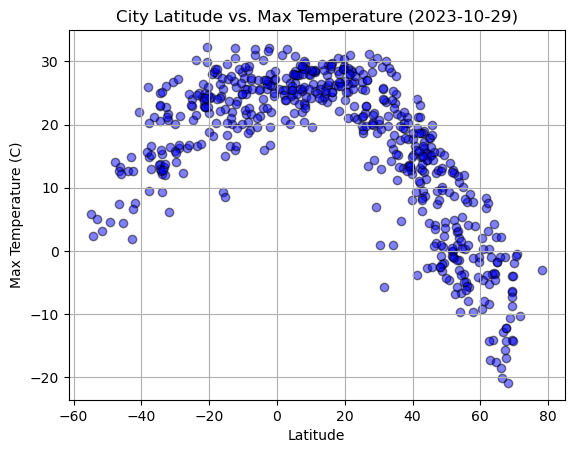

In [60]:
# Build scatter plot for latitude vs. temperature
# https://stackoverflow.com/questions/32490629/getting-todays-date-in-yyyy-mm-dd-in-python
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Max Temp"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)
# Incorporate the other graph properties

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("City Latitude vs. Max Temperature (" + date.today().isoformat() + ")")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

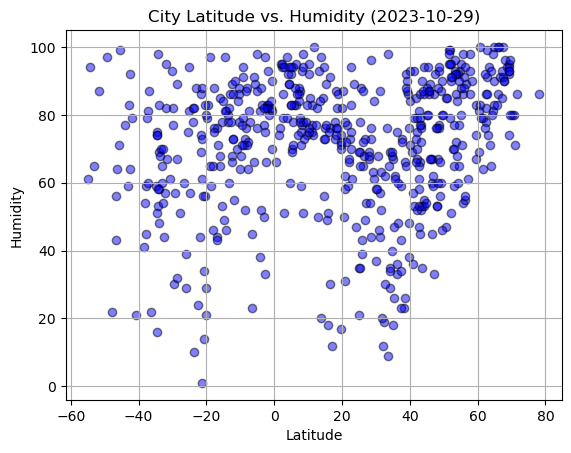

In [61]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Humidity"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)


# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.title("City Latitude vs. Humidity (" + date.today().isoformat() + ")")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

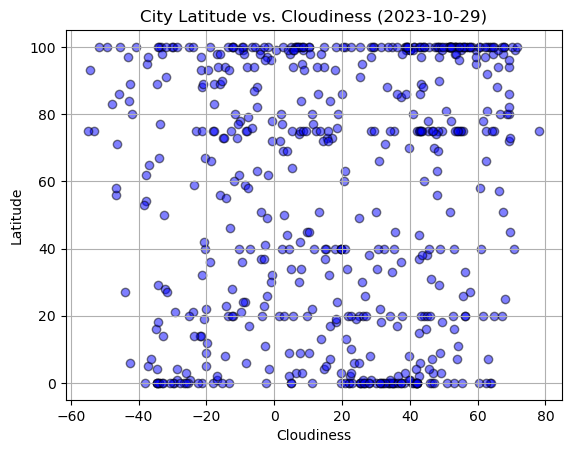

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Cloudiness"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()
plt.title("City Latitude vs. Cloudiness (" + date.today().isoformat() + ")")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

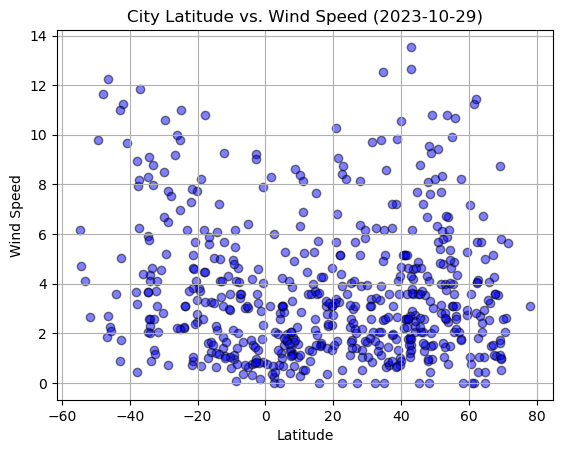

In [63]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x = city_data_df["Lat"], y = city_data_df["Wind Speed"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()
plt.title("City Latitude vs. Wind Speed (" + date.today().isoformat() + ")")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [106]:
# Define a function to create Linear Regression plots
#x = city_data_df["Lat"]
#y = city_data_df["Max Temp"]
#lat_slope, lat_int, lat_r, lat_p, lat_std_err = linregress(x, y)

def LinearRegressionLine(x_value,y_value):
    x = x_value
    y = y_value
    
    lat_slope, lat_int, lat_r, lat_p, lat_std_err = linregress(x, y)
    lat_fit = lat_slope * northern_hemi_df["Lat"] + lat_int
    
    print(f"The r value is: {lat_r}")
    plt.plot(x,lat_fit,"-",color='r')
    #return lat_fit
   

In [107]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,iqaluit,63.7506,-68.5145,-14.15,71,0,5.66,CA,1698535630
4,harnai,30.1005,67.9374,20.06,37,0,1.63,PK,1698535773
5,susuman,62.7833,148.1667,-17.23,99,92,0.45,RU,1698535684
7,albany,42.6001,-73.9662,14.82,61,37,1.79,US,1698535460
8,tura,25.5198,90.2201,18.59,88,0,1.71,IN,1698535639


In [108]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,22.89,81,100,6.95,PN,1698535607
2,invercargill,-46.4000,168.3500,13.34,64,71,2.68,NZ,1698535613
3,moranbah,-22.0016,148.0466,24.29,44,14,7.30,AU,1698535772
6,waitangi,-43.9535,-176.5597,12.68,77,27,3.58,NZ,1698535610
10,port-aux-francais,-49.3500,70.2167,4.61,97,100,9.78,TF,1698535609


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8640406313656647


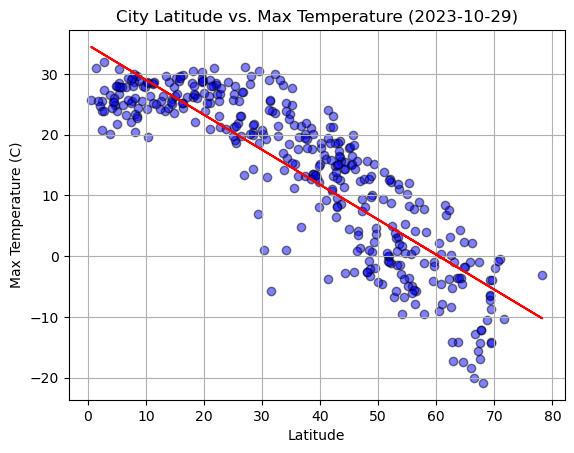

In [109]:
# Linear regression on Northern Hemisphere
plt.scatter(x = northern_hemi_df["Lat"], y = northern_hemi_df["Max Temp"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("City Latitude vs. Max Temperature (" + date.today().isoformat() + ")")

#lat_fit = lat_slope * northern_hemi_df["Lat"] + lat_int
#print(f"The r value is: {lat_r}")
LinearRegressionLine(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

#plt.plot(northern_hemi_df["Lat"],lat_fit,"-",color='r')
# Show plot
plt.show()

The r value is: 0.6837072365546153


ValueError: x and y must have same first dimension, but have shapes (183,) and (384,)

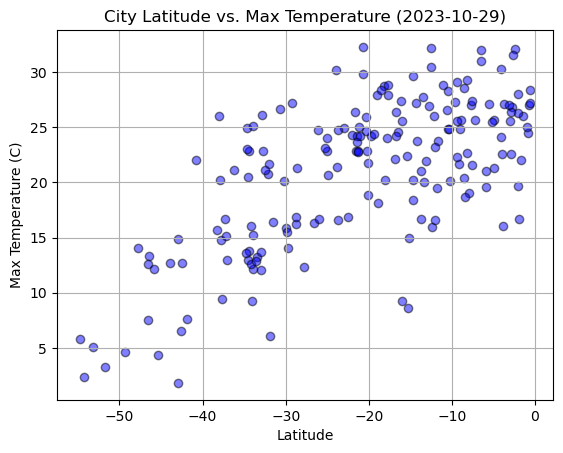

In [110]:
# Linear regression on Southern Hemisphere
plt.scatter(x = southern_hemi_df["Lat"], y = southern_hemi_df["Max Temp"],marker="o", facecolors="blue", edgecolors="black", alpha = 0.5)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
plt.title("City Latitude vs. Max Temperature (" + date.today().isoformat() + ")")

#lat_fit = lat_slope * southern_hemi_df["Lat"] + lat_int
#print(f"The r value is: {lat_r}")
#plt.plot(southern_hemi_df["Lat"],lat_fit,"-",color='r')

LinearRegressionLine(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
y_variable = city_data_df["Humidity"]
lat_slope, lat_int, lat_r, lat_p, lat_std_err = linregress(latitude, y_variable)

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE